## How to implement reverse complement

### Background

One of the most common tasks in computational biology is to determine the rewerse complement of DNA sequence. 

DNA is a genome sequence that consists of letters `A`, `C`, `G` and `T`. In nature two sequences are joint together forming a helice, where `A` from first sequence is always connected to corresponding `T` from the second sequence and `C` is connected to `G` and vice versa (that's called `complementarity`).

Additionally DNA sequences are `directional`, and sequences forming one helice have opposite directionality. Thus if we know one sequence from helice and want to determine the second one, we should create complement (A->T, C->G, G->C, T->A) and reverse it.

![caption](dnastructure.gif)
(Image: DNA helice, *source: http://www.ric.edu/faculty/jmontvilo/109graphics/dnaandrna/dnastructure.gif*)

*Example:*
*Complement of `AACGTA` is `TTGCAT`, reverse of which is `TACGTT`.*
*So, reverse complement of `AACGTA` is `TACGTT`.*

Below I present 11 differrent correct solutions to this task. Main goal of this experiment is to show the importance of effective implementation and which one is the fastest.

### Solution 1 
If-else clause

In [1]:
def revc_1(sequence):
    seq_temp = ''
    for letter in sequence:
        if letter == 'A':
            seq_temp += 'T'
        elif letter == 'G':
            seq_temp += 'C'
        elif letter == 'C':
            seq_temp += 'G'
        elif letter == 'T':
            seq_temp += 'A'
        else:
            seq_temp += 'N'
    return seq_temp[::-1]

### Solution 2
If-then-else - lists

In [2]:
def revc_2(sequence):
    list_seq = list(sequence)
    for i in range(0, len(sequence)):
        if list_seq[i] == 'A':
            list_seq[i] = 'T'
        elif list_seq[i] == 'T':
            list_seq[i] = 'A'
        elif list_seq[i] == 'C':
            list_seq[i] = 'G'
        elif list_seq[i] == 'G':
            list_seq[i] = 'C'
        else:
            list_seq[i] = 'N'
    return ''.join(list_seq[::-1])

### Solution 3
Replacement

In [3]:
def revc_3(sequence):
    return sequence.upper().replace('A', 't').replace('T', 'a').replace('C', 'g').replace('G', 'c').upper()[::-1]

### Solution 4
Maketrans

In [4]:
def revc_4(sequence):
    return sequence[::-1].translate(str.maketrans('ACGTN', 'TGCAN'))

# """
# Code for python 2:

# from string import maketrans
# return sequence[::-1].translate(maketrans('ACGTN', 'TGCAN'))
# """

### Solution 5
With dict and `reversed` function

In [5]:
def revc_5(sequence):
    complement = {'A': 'T', 'C': 'G', 'T': 'A', 'G': 'C', 'N': 'N'}
    result = []
    for i in reversed(sequence):
        result.append(complement[i])
    return ''.join(result)

### Solution 6
With dict and sequence slicing

In [6]:
def revc_6(sequence):
    complement = {'A': 'T', 'C': 'G', 'T': 'A', 'G': 'C', 'N': 'N'}
    result = ""
    for i in sequence[::-1]:
        result += complement[i]
    return result

### Solution 7
With dict and list comprehention

In [7]:
def revc_7(sequence):
    complement = {'A': 'T', 'C': 'G', 'T': 'A', 'G': 'C', 'N': 'N'}
    return (''.join([str(complement[sequence[i]]) for i in range(len(sequence))]))[::-1]

### Solution 8
With sets

In [8]:
def revc_8(sequence):
    result = ""
    for x in sequence[::-1]:
        for pair in ["GC", "AT"]:
            if x in pair:
                result += "".join(set(x) ^ set(pair))
    return result

### Solution 9
With zip

In [9]:
def revc_9(sequence):
    complement = dict(zip('ACGTN', 'TGCAN'))
    return ''.join(complement[x] for x in sequence[::-1])

### Solution 10
With lambda

In [10]:
def revc_10(sequence):
    complement = {'A': 'T', 'C': 'G', 'T': 'A', 'G': 'C', 'N': 'N'}
    return ''.join(list(map(lambda x: complement[x], sequence)))[::-1]

### Solution 11
Using biopython library

In [11]:
from Bio.Seq import Seq
def revc_11(sequence):
    seq = Seq(sequence)
    return seq.reverse_complement()

### Test

We do performance tests for three sequences that significantly differs in length:
- really short sequence created manually
- gene sequence, about 1k (human hemoglobin beta subunit)
- long sequence, about 1M (fragment of human chromosome Y)

In [12]:
from Bio import SeqIO
import numpy as np

short_sequence = "AAATA"
gene_sequence = str(SeqIO.read("data/hemoglobin.fa", "fasta").seq)
long_sequence = str(SeqIO.read("data/chrY.fa", "fasta").seq)

print("short sequence length:", len(short_sequence))
print("gene sequence length:", len(gene_sequence))
print("long sequence length:", len(long_sequence))
print()

times = np.zeros((3, 11))
for test, seq in enumerate((short_sequence, gene_sequence, long_sequence)):
    for i in range(11):
        print("test", test+1, ", function: ", i+1, ":")
        func = "revc_"+str(i+1)
        result = globals()[func](seq)
        print(func, result[:80])
        time = %timeit -o for _ in range(10): result = globals()[func](seq)
        print()
        times[test][i] = time.best

short sequence length: 5
gene sequence length: 1606
long sequence length: 1939345

test 1 , function:  1 :
revc_1 TATTT
100000 loops, best of 3: 9.3 µs per loop

test 1 , function:  2 :
revc_2 TATTT
100000 loops, best of 3: 16.8 µs per loop

test 1 , function:  3 :
revc_3 TATTT
100000 loops, best of 3: 12.3 µs per loop

test 1 , function:  4 :
revc_4 TATTT
100000 loops, best of 3: 9.86 µs per loop

test 1 , function:  5 :
revc_5 TATTT
100000 loops, best of 3: 13.2 µs per loop

test 1 , function:  6 :
revc_6 TATTT
100000 loops, best of 3: 10.4 µs per loop

test 1 , function:  7 :
revc_7 TATTT
10000 loops, best of 3: 22.9 µs per loop

test 1 , function:  8 :
revc_8 TATTT
10000 loops, best of 3: 55.9 µs per loop

test 1 , function:  9 :
revc_9 TATTT
10000 loops, best of 3: 26.4 µs per loop

test 1 , function:  10 :
revc_10 TATTT
10000 loops, best of 3: 20.4 µs per loop

test 1 , function:  11 :
revc_11 TATTT
10000 loops, best of 3: 46 µs per loop

test 2 , function:  1 :
revc_1 GCAATGAAAA

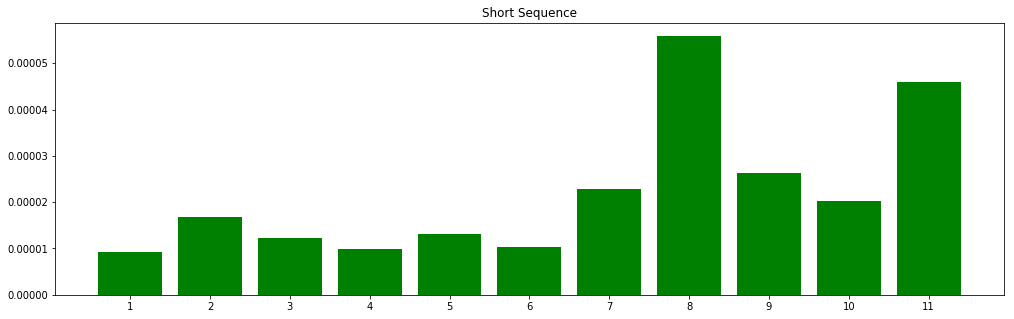

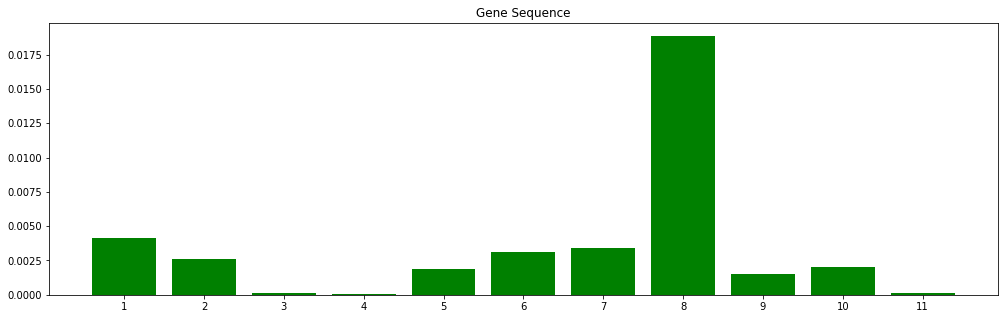

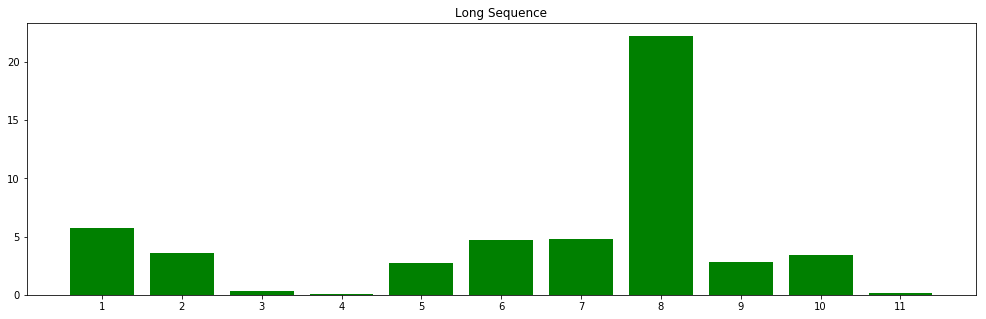

In [14]:
import matplotlib.pyplot as plt
x = np.arange(1, 12)
for test, title in enumerate(("Short Sequence", "Gene Sequence", "Long Sequence")):
    fig, ax = plt.subplots(figsize=(17, 5))
    ax.set_title(title)
    width = 0.8 
    p = ax.bar(x, times[test], width, color='g')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    plt.show()